In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
data = pd.read_excel('Extract.xlsx')
data.head()

,y,x1,x2,x3,x4
0,0,3861.22,3861.66,3860.75,3861.38
1,0,3861.19,3861.38,3860.16,3861.25
2,0,3861.38,3861.38,3858.47,3858.53
3,1,3858.72,3858.72,3857.03,3858.19
4,1,3858.09,3859.16,3858.03,3858.81


In [3]:
train_x = data.iloc[:9000,1:5]
train_y = data.iloc[:9000,0]
test_x  = data.iloc[9000:,1:5]
test_y  = data.iloc[9000:,0]

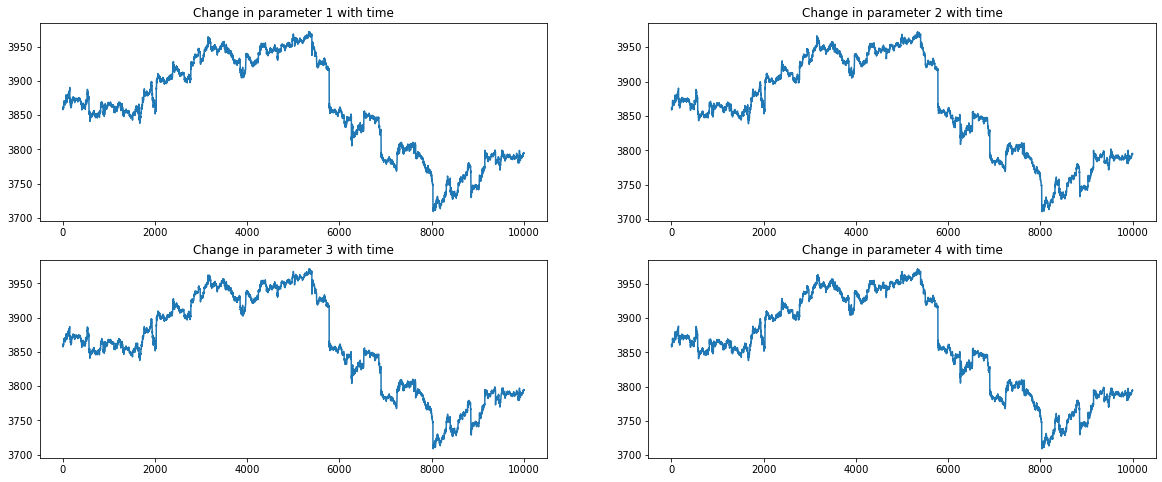

In [4]:
plt.figure(figsize = (20,8));
plt.subplot(221);
plt.plot(list(range(10000)),data.iloc[:,1]);
plt.title('Change in parameter 1 with time');
plt.subplot(222);
plt.plot(list(range(10000)),data.iloc[:,2]);
plt.title('Change in parameter 2 with time');
plt.subplot(223);
plt.plot(list(range(10000)),data.iloc[:,3]);
plt.title('Change in parameter 3 with time');
plt.subplot(224);
plt.plot(list(range(10000)),data.iloc[:,4]);
plt.title('Change in parameter 4 with time');

Text(0.5, 1.0, 'Comparison of all parameters with time')

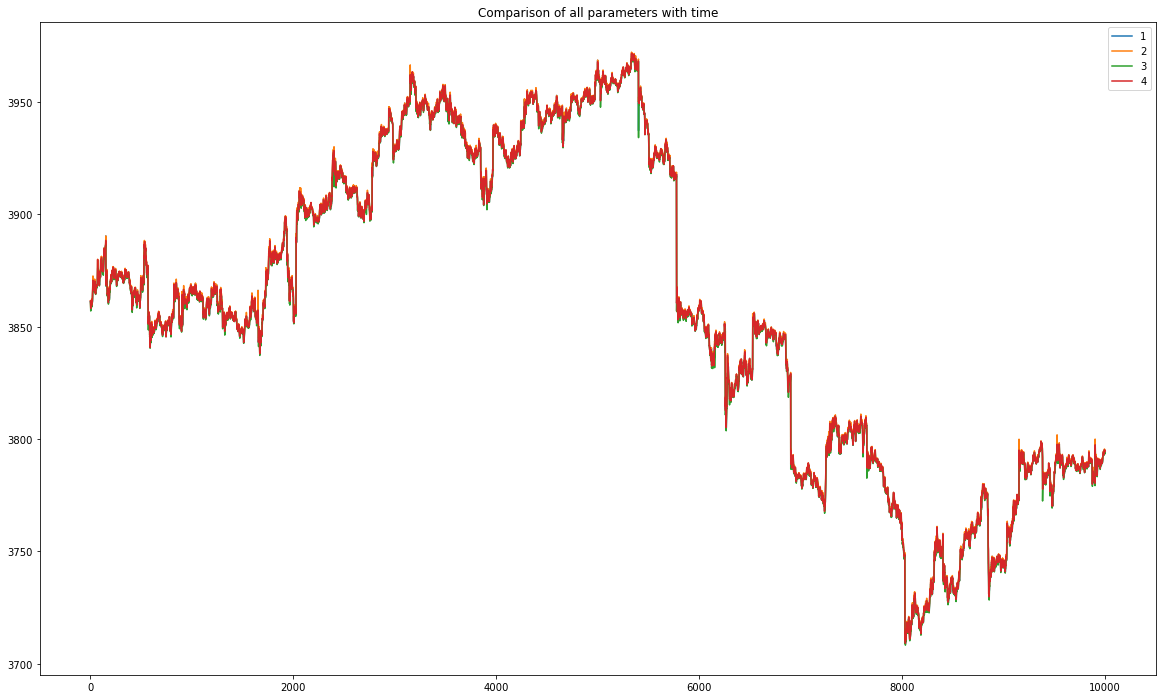

In [5]:
plt.figure(figsize=(20,12))
plt.plot(list(range(10000)),data.iloc[:,1],label='1')
plt.plot(list(range(10000)),data.iloc[:,2],label='2')
plt.plot(list(range(10000)),data.iloc[:,3],label='3')
plt.plot(list(range(10000)),data.iloc[:,4],label='4')
#plt.scatter(list(range(10000)),np.array(data.iloc[:,0])*3000,label='buy/sell')
plt.legend()
plt.title('Comparison of all parameters with time')

# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)
clf.score(test_x, test_y)

0.565

In [8]:
df1=pd.read_csv('test_gc.csv')
df1

,x1,x2,x3,x4
0,3798.66,3798.84,3798.09,3798.16
1,3798.22,3798.78,3798.13,3798.53
2,3798.50,3799.06,3798.28,3798.28
3,3798.31,3798.41,3797.53,3798.06
4,3797.94,3798.78,3797.84,3798.75
...,...,...,...,...
995,3749.84,3750.09,3749.44,3749.75
996,3749.88,3749.88,3749.03,3749.25
997,3749.31,3749.38,3746.63,3746.81
998,3747.03,3747.28,3746.00,3746.31


In [9]:
y_predict=clf.predict(df1)
dfy=pd.DataFrame(y_predict)

In [10]:
dfy.to_excel("output.xlsx", header=['Y_predictions'], index=False)  

In [11]:
intercept=clf.coef_
slope=clf.intercept_

In [12]:
filename='weights.h5'
pickle.dump(clf,open(filename,'wb'))

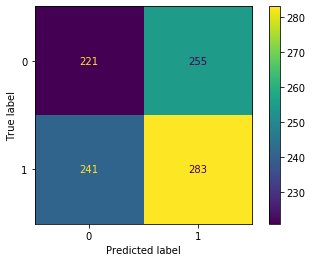

In [14]:
cm = confusion_matrix(test_y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()